# Q1.)

In [31]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DataSets/')

Mounted at /content/drive/


In [32]:
import pandas as pd

## i.)

In [33]:
read_data = pd.read_csv('people.txt')

## ii.)

In [34]:
import numpy as np

def check_age_range(read_data):
    rule_1 = lambda ag: 0 <= ag <= 150
    ans = read_data['Age'].apply(rule_1).rename('check_age_range')
    if np.any(False == ans):
        print('Violation : Age is not in range 0-150 in some places')
        print(f'Violation : {ans.size - np.count_nonzero(ans)}')
    else:
        print('No Violation')
    return (ans)
def check_age(read_data):
    rule_2 = lambda ro: ro[0] > ro[1]
    ans = read_data[['Age','yearmarried']].apply(rule_2, axis=1).rename('check_age')
    if np.any(False == ans):
        print('Violation : Age is not greater than yearsmarried in some places')
        print(f'Violation : {ans.size - np.count_nonzero(ans)}')
    else:
        print('No Violation')
    return (ans)
def check_status(read_data):
    rule_3 = lambda stat: stat in ['married', 'single', 'widowed']
    ans = read_data["status"].apply(rule_3).rename('check_status')
    if np.any(False == ans):
        print('Violation : Status is not married or single or widowed in some places')
        print(f'Violation : {ans.size - np.count_nonzero(ans)}')
    else:
        print('No Violation')
    return (ans)
def check_group(read_data):
    rule_4 = lambda ro: ro[1] == 'child' if (ro[0] < 18) else (ro[1] == 'adult' if 18 <= ro[0] <= 65 else ro[1] == 'elderly')
    ans = read_data[['Age', 'agegroup']].apply(rule_4, axis=1).rename('check_group')
    if np.any(False == ans):
        print('Violation : Age Group is not correct in some places')
        print(f'Violation : {ans.size - np.count_nonzero(ans)}')
    else:
        print('No Violation')
    return (ans)

## iii.)

In [35]:
E = {'check_age_range':check_age_range, 'check_age':check_age, 'check_status':check_status, 'check_group':check_group}

In [36]:
result = [E[key](read_data) for key in E.keys()]
result

Violation : Age is not in range 0-150 in some places
Violation : 1
Violation : Age is not greater than yearsmarried in some places
Violation : 1
No Violation
Violation : Age Group is not correct in some places
Violation : 1


[0     True
 1     True
 2     True
 3    False
 4     True
 Name: check_age_range, dtype: bool, 0     True
 1     True
 2    False
 3     True
 4     True
 Name: check_age, dtype: bool, 0    True
 1    True
 2    True
 3    True
 4    True
 Name: check_status, dtype: bool, 0     True
 1     True
 2     True
 3     True
 4    False
 Name: check_group, dtype: bool]

In [41]:
res_df = pd.DataFrame(result)
print(res_df)

                    0     1      2      3      4
check_age_range  True  True   True  False   True
check_age        True  True  False   True   True
check_status     True  True   True   True   True
check_group      True  True   True   True  False


## iv.)

In [38]:
print(res_df.describe())

           0     1     2     3     4
count      4     4     4     4     4
unique     1     1     2     2     2
top     True  True  True  True  True
freq       4     4     3     3     3


## v.)

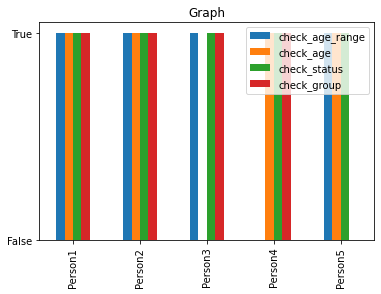

In [42]:
import matplotlib.pyplot as plt

res_df.T.astype('int').plot(kind='bar')
plt.yticks([0, 1], ['False', 'True'])
plt.xticks([0, 1, 2, 3, 4], ['Person1', 'Person2', 'Person3', 'Person4', 'Person5'])
plt.title('Graph')
plt.show()